In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

In [2]:
gd_data = sio.loadmat('gradient_descent_data.mat')

In [3]:
gd_x = gd_data['x']
gd_y = gd_data['y']

In [4]:
def mean_square_error (w, gd_x, gd_y):
    return np.sum(np.power(np.dot(gd_x, w) - gd_y, 2))/np.size(gd_y)

def feat_normalize(gd_x):
    mu = np.mean(gd_x, axis = 0)
    sigma = np.ones((1, np.size(gd_x, axis = 1)),dtype = np.float)
    for i in range(np.size(gd_x, axis = 1)):
        sigma[0][i] = np.sqrt(np.sum(np.power(gd_x[:,i] - mu[i], 2))/np.size(gd_x, axis = 0))
        gd_x[:,i] = (gd_x[:,i] - mu[i])/sigma[0][i]
    return gd_x


# a) Batch Gradient Descent

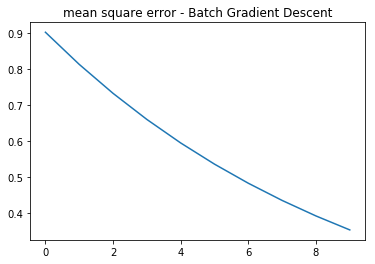

In [5]:
def batch_gd (gd_x, gd_y, init_w, lr = 0.05, ite = 10):
    w = init_w 
    error = []
    gd_x = feat_normalize(gd_x)
    gd_y = feat_normalize(gd_y)
    for i in range(ite):
        w = w - lr * (np.dot(np.dot(gd_x.T, gd_x), w) - np.dot(gd_x.T, gd_y))/gd_y.shape[0]
        error.append(mean_square_error(w, gd_x, gd_y))
    plt.plot(range(ite), error) 
    plt.title('mean square error - Batch Gradient Descent')
    plt.show()
    return w
w = batch_gd(gd_x.copy(), gd_y.copy(), np.zeros((2,1)), lr = 0.05, ite = 10)

# b) Stochastic Gradient Descent

In [6]:
def stochastic_gd(gd_x, gd_y, init_w, mini_batch = 1, lr = 0.005, epochs = 10):
    w = init_w.copy()
    gd_x = feat_normalize(gd_x)
    gd_y = feat_normalize(gd_y)
    error = []
    for i in range(epochs):
        for j in range(0, gd_y.shape[0], mini_batch):
            end  = min(j + mini_batch, gd_y.shape[0])
            w = w - lr * (np.dot(np.dot(gd_x[j:end,:].T, gd_x[j:end,:]), w) 
                          - np.dot(gd_x[j:end,:].T, gd_y[j:end,:]))/mini_batch
        error.append(mean_square_error(w, gd_x, gd_y))
    plt.plot(range(np.size(error)),error)
    plt.title('mean square error - Stochastic Gradient Descent')
    plt.show()
    return w

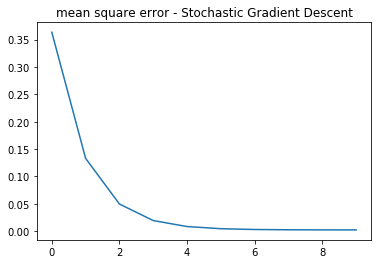

In [7]:
w = stochastic_gd(gd_x.copy(), gd_y.copy(), np.zeros((2,1)), mini_batch = 1, lr = 0.0005, epochs = 10)

# c) Coordinate Gradient Descent

In [8]:
def coordinate_gd(gd_x, gd_y, init_w, mini_batch = 1, lr = 0.005, ite = 100, algo = 'FLS'):
    w = init_w.copy()
    gd_x = feat_normalize(gd_x)
    gd_y = feat_normalize(gd_y)
    error = []
    if (algo == 'FLS'):
        for i in range(ite):
            coord = np.random.randint(0,gd_x.shape[1])
            w[coord] = np.dot(gd_x[:, coord].T,gd_y)/np.dot(gd_x[:,coord].T,gd_x[:,coord])
            error.append(mean_square_error(w, gd_x, gd_y))
        plt.plot(range(ite),error)
        plt.title('FLS Coordinate Descent MSE')
    elif (algo == 'FGD'):
        for i in range(ite):
            coord = np.random.randint(0,gd_x.shape[1])
            grad = np.dot((np.dot(gd_x, w) - gd_y).T, gd_x[:,coord])/gd_y.shape[0]
            w[coord] = w[coord] - lr * grad
            error.append(mean_square_error(w, gd_x, gd_y))
        plt.plot(range(ite),error)
        plt.title('FGD Coordinate Descent MSE')
    elif (algo == 'SGD'):
        for i in range(ite):
            for j in range(0, gd_y.shape[0], mini_batch):
                coord = np.random.randint(0,gd_x.shape[1])
                end = min(j + mini_batch, gd_y.shape[0])
                grad = np.dot((np.dot(gd_x[j:end], w) - gd_y[j:end]).T, gd_x[j:end, coord])/mini_batch
                w[coord] = w[coord] - lr * grad
            error.append(mean_square_error(w, gd_x, gd_y))
        plt.plot(range(ite),error)
        plt.title('SGD Coordinate Descent MSE')
    plt.show()
    return w
        

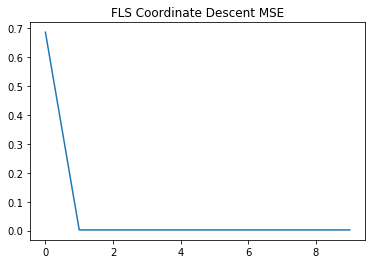

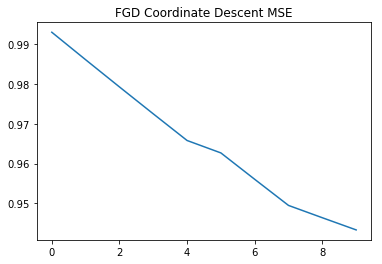

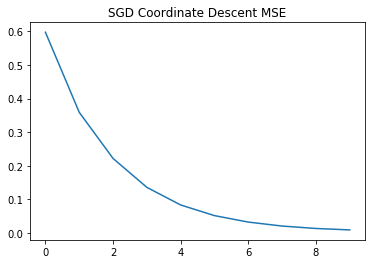

In [9]:
w_FLS = coordinate_gd(gd_x.copy(), gd_y.copy(), np.zeros((2,1)), ite = 10, algo = 'FLS')
w_FGD = coordinate_gd(gd_x.copy(), gd_y.copy(), np.zeros((2,1)), lr = 0.005, ite = 10, algo = 'FGD')
w_SGD = coordinate_gd(gd_x.copy(), gd_y.copy(), np.zeros((2,1)), mini_batch = 1, lr = 0.0005, ite = 10, algo = 'SGD')

# d) Kaczmarz Stochastic Gradient Descent 

In [130]:
def kaczmarz_sgd(gd_x, gd_y, init_w, ite = 10):
    # initialize probability for learning rate
    prob = []
    for i in range(gd_y.shape[0]):
        prob.append((np.linalg.norm(gd_x[i,:],2)/np.linalg.norm(gd_x,2))**2)
    w = init_w.copy()
    gd_x = feat_normalize(gd_x)
    gd_y = feat_normalize(gd_y)
    error = []
    for j in range(1):
        for k in range(ite):
            # get the random picked index 
            ind = np.random.choice(range(gd_y.shape[0]), 1, prob)
            grad = (np.dot(gd_x[ind], w) - gd_y[ind])*gd_x[ind]
            lr = 1.0/(np.linalg.norm(gd_x[ind,:],2)**2)
            w = w - lr * grad.T
            error.append(mean_square_error(w, gd_x, gd_y))
    plt.plot(range(ite),error)
    plt.title('Kaczmarz SGD Descent MSE')
    plt.show()
    return w

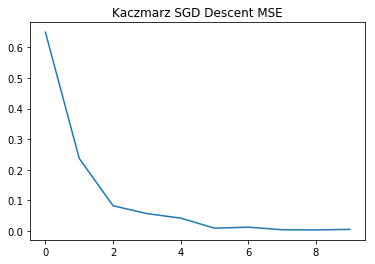

[[ 0.81994384]
 [ 0.49208224]]


In [160]:
w = kaczmarz_sgd(gd_x.copy(), gd_y.copy(), np.zeros((2,1)), ite = 10)
print(w)

# e) Redo nonlinear data

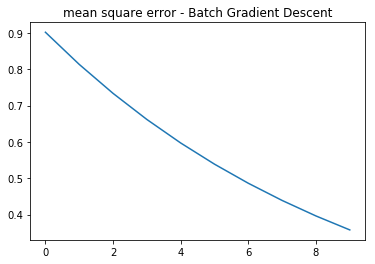

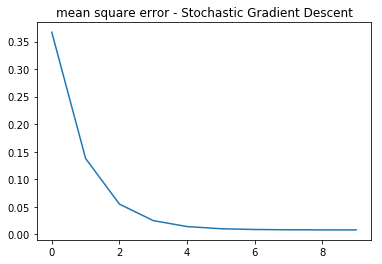

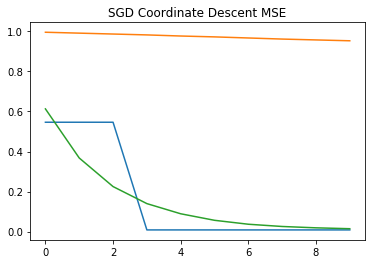

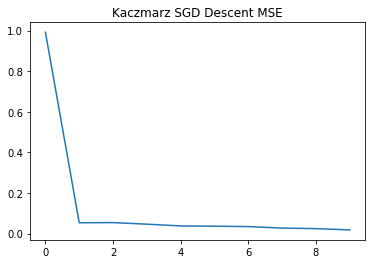

In [152]:
gd_y_non = gd_y + np.asarray([np.power(gd_x[:,1], 3)*0.1]).T
w_gd_non = batch_gd(gd_x.copy(), gd_y_non.copy(), np.zeros((2,1)), lr = 0.05, ite = 10)
w_sgd_non = stochastic_gd(gd_x.copy(), gd_y_non.copy(), np.zeros((2,1)), mini_batch = 1, lr = 0.0005, epochs = 10)
w_FLS_non = coordinate_gd(gd_x.copy(), gd_y_non.copy(), np.zeros((2,1)), ite = 10, algo = 'FLS')
w_FGD_non = coordinate_gd(gd_x.copy(), gd_y_non.copy(), np.zeros((2,1)), lr = 0.005, ite = 10, algo = 'FGD')
w_SGD_non = coordinate_gd(gd_x.copy(), gd_y_non.copy(), np.zeros((2,1)), mini_batch = 1, lr = 0.0005, ite = 10, algo = 'SGD')
w_KSGD_non = kaczmarz_sgd(gd_x.copy(), gd_y_non.copy(), np.zeros((2,1)), ite = 10)
plt.show()